# Decision Tree Classifier
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

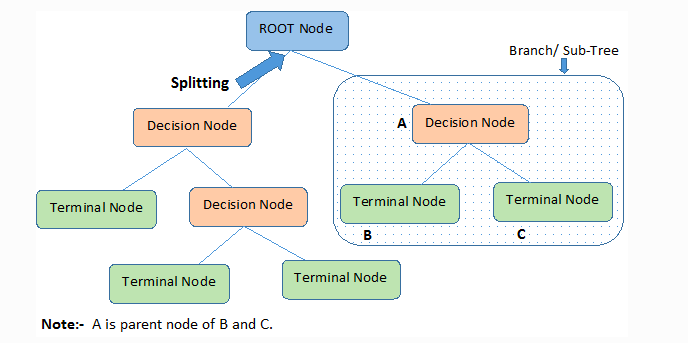

## Terminologies:
**Root Node:** It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

**Splitting:** It is a process of dividing a node into two or more sub-nodes.

**Decision Node:** When a sub-node splits into further sub-nodes, then it is called the decision node.

**Leaf / Terminal Node:** Nodes do not split is called Leaf or Terminal node.

**Branch / Sub-Tree:** A subsection of the entire tree is called branch or sub-tree.

**Parent and Child Node:** A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

## Steps:
    (1)It begins with the original set S as the root node.
    (2)On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.
    (3)It then selects the attribute which has the smallest Entropy or Largest Information gain.
    (4)The set S is then split by the selected attribute to produce a subset of the data.
    (5)The algorithm continues to recur on each subset, considering only attributes never selected before.
    
### Note: 
**This notebook gives an gentle introduction to DecisionTrees with no HyperParameter Tuning.** <br>
**The various Measuring attributes (Entropy, Information Gain,..) will be discussed in detail later.<br>
**Complex Hyperparameter Turning will be performed in future projects.**

## Predict IT Job Salaries by analysing some parameters (using some fictional dataset)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/it_salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [4]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [5]:
target = df['salary_more_then_100k']

In [6]:
# to convert categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
#create dummy_variables
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [8]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [9]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [11]:
#Training the model
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)       # we can also assign criterion='entropy'

DecisionTreeClassifier()

In [12]:
#prediction
model.predict(inputs_n)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
#accuracy
model.score(inputs_n,target)

#Since, we train and test on the same dataset, Training accuracy = 1

1.0

### Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [14]:
model.predict([[2,1,0]])

array([0], dtype=int64)

### Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [15]:
model.predict([[2,1,1]])

array([1], dtype=int64)

## Further Reference: 
**https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html**<br>
**https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96**<br>
**https://www.geeksforgeeks.org/decision-tree-introduction-example/**<br>
**https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/**<br>
**https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/**<br>
